In [1]:
%load_ext autoreload
%autoreload 10
%matplotlib inline

from ANN_simulation import *

In [6]:
# fix dataset, compare different autoencoders

# root_dir = '../previous_runs/snapshot_2015_11_28_14_48_30(finish_27_iterations_and_WHAM)/'
# root_dir = '../previous_runs/snapshot_2015_11_04_21_02_56(automatically_9_iterations)/'
root_dir = '../previous_runs/snapshot_2015_11_29_19_36_54(another_series_of_11_iterations)/'

for i in range(15, 20):
    
    a=pickle.load(open(root_dir + 'resources/network_%d.pkl' % i,'rb'))
    print("FVE = %f" % a.get_fraction_of_variance_explained())
    
    b=plotting(a)

    my_file_list = coordinates_data_files([root_dir + 'target/'])._list_of_coor_data_files
    my_file_list = filter(lambda x: x.find('network_27') == -1, my_file_list)
    cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)

    color = [item[2] for item in a.get_many_dihedrals_from_coordinates_in_file(my_file_list)]

    temp_fig = b.plotting_with_coloring_option(plotting_space = "PC",
                                        cossin_data_for_plotting=cossin_data, 
                                        color_option='other', 
                                        other_coloring = color,
                                        )

    
plt.show()

IOError: [Errno 2] No such file or directory: '../previous_runs/snapshot_2015_11_29_19_36_54(another_series_of_11_iterations)/resources/network_15.pkl'

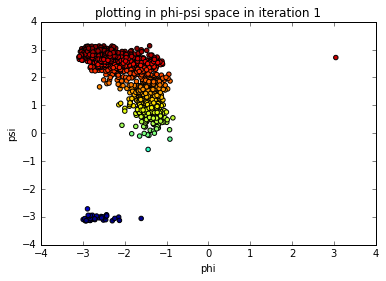

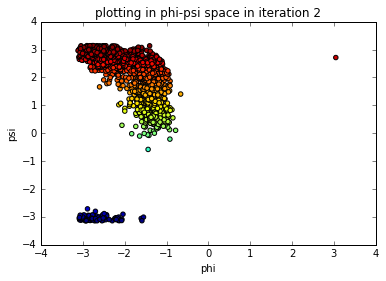

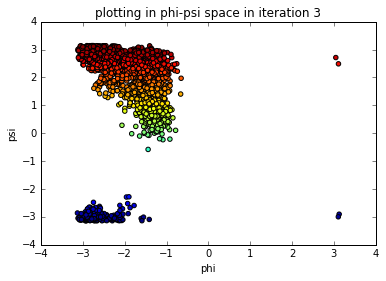

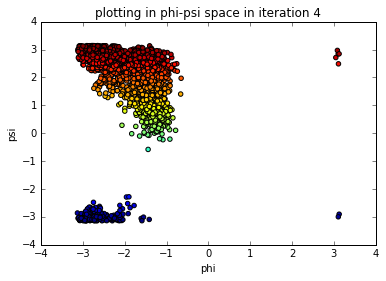

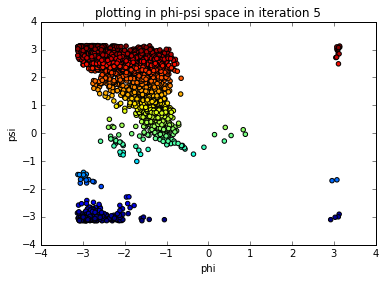

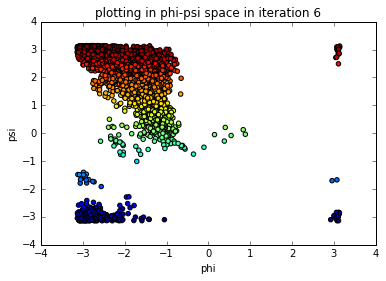

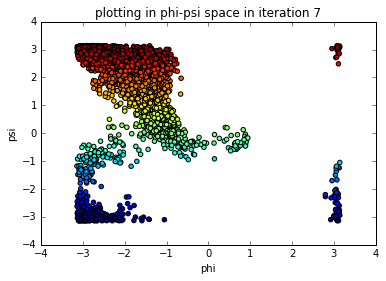

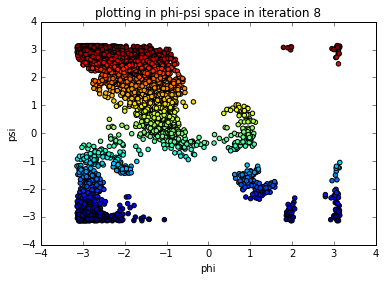

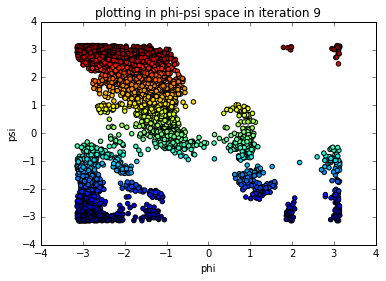

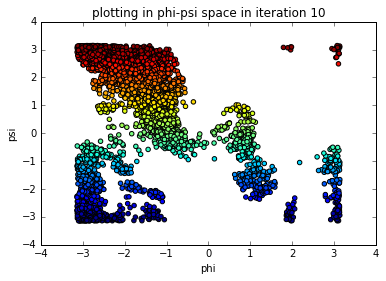

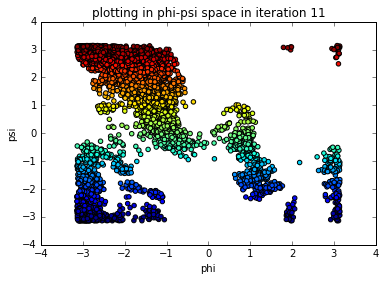

In [2]:
# fix autoencoder, compare different datasets
%matplotlib inline

root_dir = '../previous_runs/snapshot_2015_11_28_14_48_30(finish_27_iterations_and_WHAM)/'

folder_list = [root_dir + 'target/network_%d/' % item for item in range(1, 12)]
a=pickle.load(open(root_dir + 'resources/network_1.pkl','rb'))
my_file_list = [root_dir + 'target/unbiased/unbiased_output_coordinates.txt']

i = 1

for item in folder_list:
    
    b=plotting(a)
    my_file_list += coordinates_data_files_list([item])._list_of_coor_data_files
    cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)
    color = [item[2] for item in sutils.get_many_dihedrals_from_coordinates_in_file(my_file_list)]
    temp_fig = b.plotting_with_coloring_option(plotting_space = "phipsi",
                                        cossin_data_for_plotting = cossin_data,
                                        color_option='other', 
                                        other_coloring = color,
                                        axis_ranges=[[-4,4],[-4,4]],
                                        title="plotting in phi-psi space in iteration %d" % i
                                        )
#     temp_fig.savefig('iteration_%d.png' % i)
    
    i += 1
plt.show()

In [ ]:
# generate mat file for WHAM
from ANN_simulation import *

a=pickle.load(open('../resources/network_27.pkl','rb'))
a.generate_mat_file_for_WHAM_reweighting(coordinates_data_files(['../target/network_27/'])._list_of_coor_data_files)

In [2]:
# pick top left corner and train, and run WHAM

my_file_list = coordinates_data_files_list(list_of_dir_of_coor_data_files=['../previous_runs/snapshot_2015_11_28_14_48_30(finish_27_iterations_and_WHAM)/'])
cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list._list_of_coor_data_files)
dihedrals = sutils.get_many_dihedrals_from_cossin(cossin_data)
phi_and_psi = [[item[1], item[2]] for item in dihedrals]

cossin_data_in_top_left_corner = []
for i in range(len(phi_and_psi)):
    if phi_and_psi[i][0] < 0 and phi_and_psi[i][1] > 0:
        cossin_data_in_top_left_corner += [cossin_data[i]]
        

In [9]:
a = neural_network_for_simulation(index=1447, 
                                  training_data_interval = 3,
                                  data_set_for_training=cossin_data_in_top_left_corner,
                                  node_num = [8, 12, 2, 12, 8],
                                  max_num_of_training=50
                                 )
a.train()
a.save_into_file('network_1447.pkl')

start training network with index = 1447

Done training network with index = 1447



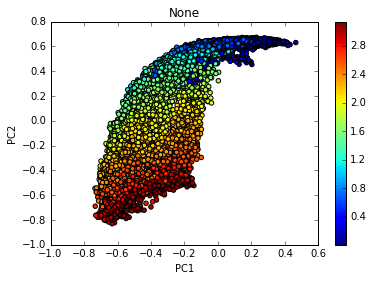

In [2]:
a = pickle.load(open('../resources/network_1447.pkl','rb'))
b = plotting(a)
temp_fig, temp_ax, temp_im = b.plotting_with_coloring_option(plotting_space = "PC",
                                color_option = 'psi'
                               )


In [2]:
# generate mat file for calculating FES, using WHAM

my_file_list = coordinates_data_files_list(['../target/network_1447/']).get_list_of_coor_data_files()
a = pickle.load(open('../resources/network_1447.pkl','rb'))
a.generate_mat_file_for_WHAM_reweighting(my_file_list)

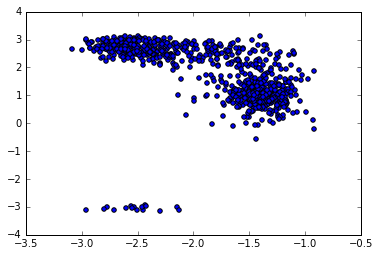

In [6]:
my_file_list = coordinates_data_files_list(['../target/unbiased/']).get_list_of_coor_data_files()

my_dihedrals = sutils.get_many_dihedrals_from_coordinates_in_file(my_file_list)

unbiased_phi = [item[1] for item in my_dihedrals]
unbiased_psi = [item[2] for item in my_dihedrals]

plt.scatter(unbiased_phi, unbiased_psi)
